## Hotel Booking Analysis and Prediction

In [1]:
# Importing Libraries

# Numpy for mathematical operations & Pandas for data manipulation and analysis
import numpy as np
import pandas as pd

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Matplotlib for  data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats

# Standard Scaler
from sklearn.preprocessing import StandardScaler

#SVM
from sklearn.svm import SVC
from sklearn import metrics

# SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
df.duplicated().sum()

28

In [11]:
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'pie chart')

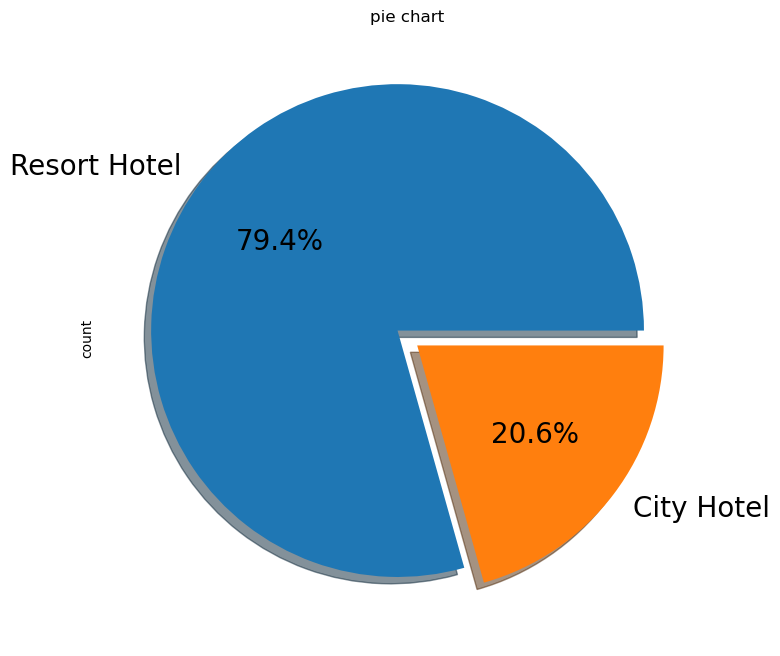

In [12]:
df['hotel'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True,figsize=(10,8),fontsize=20)
plt.title('pie chart')

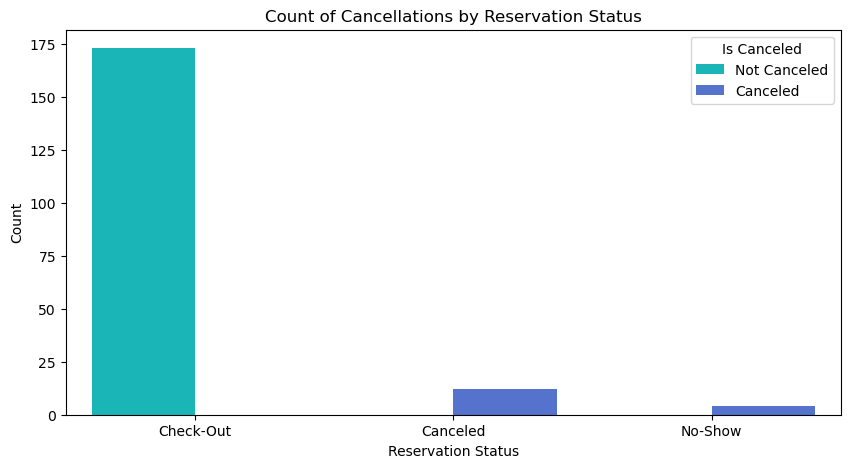

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

Text(0.5, 1.0, 'yearly bookings')

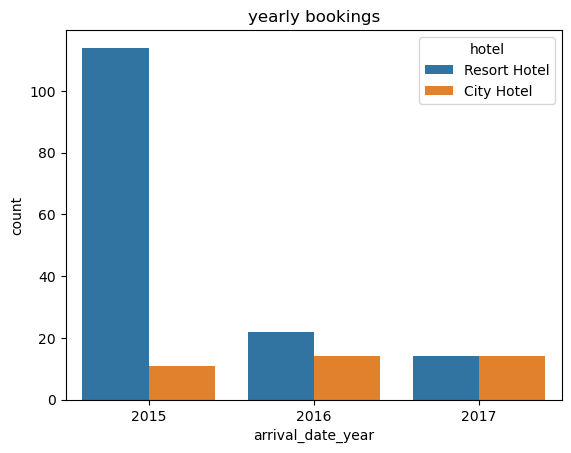

In [14]:
sns.countplot(x='arrival_date_year',data=df,hue='hotel').set_title('yearly bookings')

We can see that city hotels have the hightest yearly bookings compared to resort hotels

In [15]:
a=df.groupby('hotel')['is_canceled'].mean()
a

hotel
City Hotel      0.051282
Resort Hotel    0.093333
Name: is_canceled, dtype: float64

<Axes: xlabel='hotel', ylabel='is_canceled'>

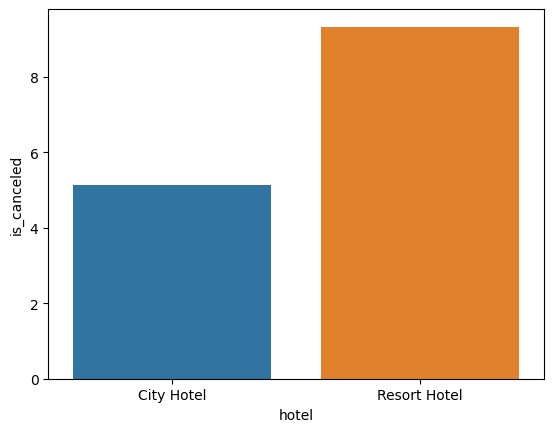

In [16]:
sns.barplot(x=a.index,y=a*100)

Around 30% bookings were cancelled in city hotels and 23% was in resort hotels

<Axes: >

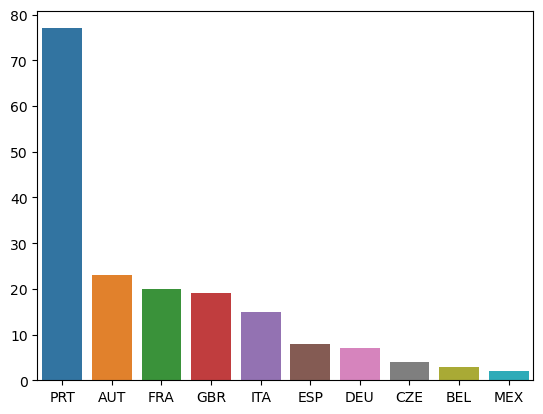

In [17]:
sns.barplot (y= list(df.country.value_counts().head(10)), x= list(df.country.value_counts().head(10).index))

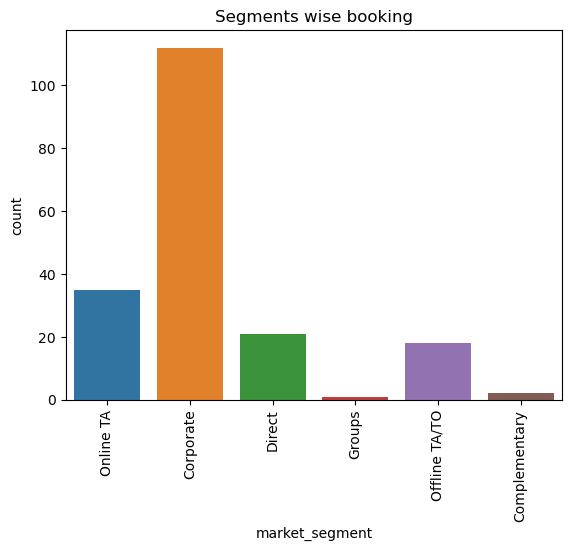

In [18]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

In [19]:
df.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

In [20]:
df = df.drop(['reservation_status','assigned_room_type','reservation_status_date'], axis=1)

In [21]:
df['arrival_date_year'].value_counts()

arrival_date_year
2015    125
2016     36
2017     28
Name: count, dtype: int64

In [22]:
df = df.drop(['arrival_date_year'], axis=1)

In [23]:
df['children'].value_counts()

children
0.0    183
1.0      4
2.0      2
Name: count, dtype: int64

In [24]:
df['children'].isnull().sum()

0

In [25]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list              

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
le.fit_transform(["hotel","arrival_date_month","market_segment","distribution_channel","meal","reserved_room_type","deposit_type","customer_type"])

array([4, 0, 5, 3, 6, 7, 2, 1], dtype=int64)

In [27]:
string_sutun = 'hotel' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [28]:
string_sutun = 'arrival_date_month' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [29]:
string_sutun = 'market_segment' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [30]:
string_sutun = 'distribution_channel' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [31]:
string_sutun = 'meal' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [32]:
string_sutun = 'reserved_room_type' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [33]:
string_sutun = 'deposit_type' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [34]:
string_sutun = 'customer_type' 
df[string_sutun] = le.fit_transform(df[string_sutun])

In [35]:
df.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                            object
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             float64
company                           float64
days_in_waiting_list              

([<matplotlib.axis.YTick at 0x21aca1ba010>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70')])

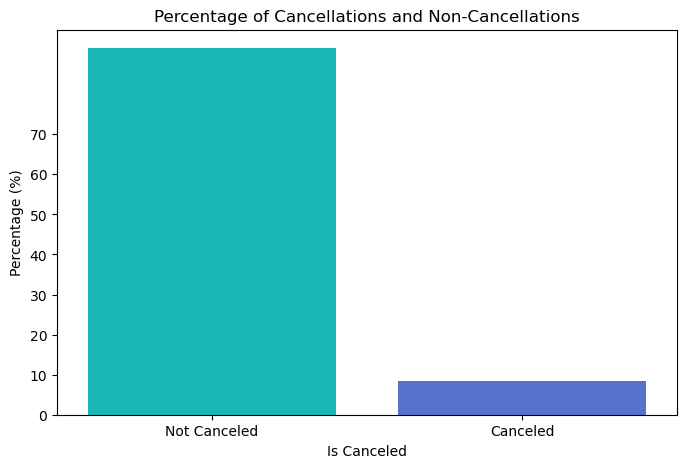

In [36]:
percentage = df['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

In [37]:
x = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [40]:
# Encode categorical variables
label_encoder = LabelEncoder()
x['arrival_date_month'] = label_encoder.fit_transform(X['arrival_date_month'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Predictions
y_pred = logistic_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'X' is not defined

In [ ]:
# Select features and target variable
X = df[['lead_time', 'arrival_date_month', 'previous_cancellations']]
y = df['is_canceled']


In [ ]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Select features and target variable
X = df[['lead_time', 'arrival_date_month', 'previous_cancellations']]
y = df['is_canceled']

# Encode categorical variables
label_encoder = LabelEncoder()
X['arrival_date_month'] = label_encoder.fit_transform(X['arrival_date_month'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred = random_forest.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X = df[['lead_time', 'arrival_date_month', 'previous_cancellations']]
y = df['is_canceled']

# Encode categorical variables
label_encoder = LabelEncoder()
X['arrival_date_month'] = label_encoder.fit_transform(X['arrival_date_month'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()